### 4️⃣ Gradient Descent 경사하강법
(미분하여 구한 경사를 이용)

- 컴퓨터에서 $x^2$의 최적값 찾기

- 0에 근접할 때까지 알고리즘이 돌아감  
$f(x) = x^2$  
$x_{new} = x_{old} - \alpha$ X $(2x_{old})$  

- 정해야 하는 것  
Parameter : iteration, Learning rate ( $\alpha$ )  
  
  
- Iteration, Learning rate 너무 작을 경우 끝까지 못감 ! 
- Iteration : Big, Learning rate : Small $\Rightarrow$ 시간이 오래 걸림
- Iteration : Small, Learning rate : Big $\Rightarrow$ 데이터가 튀거나 수렴하지 못하는 경우 발생

In [1]:
x = 10
derivative = []
y = []

# iteration : 1000
for i in range(1000):
    # 현재값
    old_value = x
    # f(x) = x^2
    y.append(old_value**2)
    # alpha = 0.1
    derivative.append(old_value - 0.01 * 2 * old_value)
    x = old_value - 0.01 * 2 * old_value

### 굴곡이 많은 함수의 경우

In [2]:
import numpy as np

$f(x) = x sin(x^2) + 1$

In [3]:
def sin_function(x):
    return x * np.sin(x**2) + 1

def derivitive_f(x):
    return np.sin(x**2) + 2 * (x**2) * np.cos(x**2) 

In [4]:
x = np.arange(-3,3,0.001)
f_x = sin_function(x)

In [5]:
import matplotlib.pyplot as plt

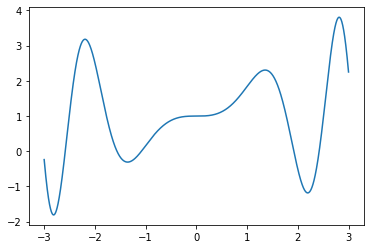

In [6]:
plt.plot(x, f_x)
plt.show()

- 시작점에 의해 수렴을 할 수도 있고 안할 수도 있음

### 5️⃣ Linear Regression with GD

$ h_\theta x^{(i)} = w_1 x^{(i)} + w_0$  
$J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m (h_\theta x^{(i)} -y^{(i)})^2$  
  
<span style = 'background-color:#fff5b1'>Minimize $J(w_0,w_1)$</span>   

In [7]:
import matplotlib.pyplot as plt
import numpy as np

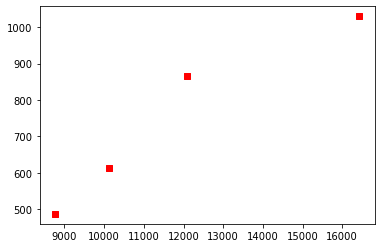

In [8]:
x_data = np.array([8759,10132,12078,16430])
y_data = np.array([487,612,866,1030])

plt.scatter(x_data, y_data, color = 'r', marker = 's')
plt.show()

In [9]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)

In [10]:
weight_0, weight_1

(array([0.41057379, 0.58622774, 0.77016063, 0.06824361, 0.82606435]),
 array([0.06843211, 0.81473467, 0.38276329, 0.95220472, 0.35322538]))

In [11]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1):
    y_hat_list.append(w0 + w1 * x_data)

In [12]:
y_hat_list

[array([ 599.80740649,  693.76469057,  826.93357245, 1124.75010583]),
 array([ 7136.84718664,  8255.47788609,  9840.95155044, 13386.67682651]),
 array([3353.39381346, 3878.92780996, 4623.78517135, 6289.57100731]),
 array([ 8340.42936553,  9647.80644287, 11500.79682342, 15644.79175465]),
 array([3094.7271558 , 3579.70560066, 4267.08218748, 5804.31903529])]

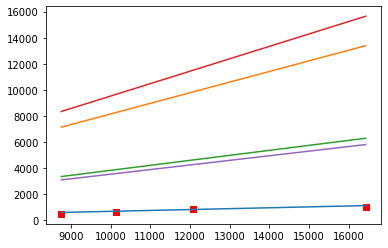

In [13]:
plt.scatter(x_data, y_data, color = 'r', marker = 's')
for y_hat in y_hat_list:
    plt.plot(x_data,y_hat)

plt.show()

그래프가 점점 밑으로 낮아지는 것을 볼 수 있음  
오차가 0에 가까워지도록 점점 내려감

#### <span style = 'color:blue'>결국 Parameter ($\theta_0, \theta_1$)의 업데이트 </span>
- 임의의 $\theta_0(w_0), \theta_1(w_1)$값으로 초기화
- Cost Function $J(\theta_0, \theta_1)$이 최소화 될 때까지 학습
- 더 이상 Cost Function이 줄어들지 않거나 학습 횟수를 초과할 때 종료
- Learning rate, Iteration 횟수 등 Parameter 지정
- Feature가 많으면 Normal Equation에 비해 상대적으로 빠름
- 최적값에 수렴하지 않을 수도 있음

#### 이전과 동일한 방식
$x_{new} = x_{old}- \alpha$ X $(2x_{old})$
   
이를 다음과 같이 사용  
  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1)$  
  
<span style = 'color:red'>⛔주의 할 점 Simultaneously</span>  
- $\theta_1$업데이트 시 업데이트 된 $\theta_0$를 사용하는 것이 아님 !
- 둘다 업데이트가 된 후 우측항의 $J(\theta_0, \theta_1)$에 대입해야 함
- $\theta_0, \theta_1$은 <span style= 'color:#008000'>동시적으로 업데이트</span> 되어야 함

우측항 $J(\theta_0, \theta_1)$에 들어갈 $\theta_0, \theta_1$

- $\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})$ 

- $\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})x^{(i)}$

- $\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial w_0}$

- $\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial w_1}$

### 6️⃣ Implementation
#### 목적 : Gradient Descent로 Linear Regression 구해보기
#### Linear Regression with one variable, implemented by numpy


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

#### Load Dataset
in the following data
- X : number of claims
- Y : total payment for all the claims in thousnads of Swedish Kronor
for geographical zones in Sweden Reference : Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from : http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [15]:
df = pd.read_csv('data./slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


- data 총 개수

In [16]:
len(df)

63

In [17]:
raw_X = df['X'].values.reshape(-1,1)
raw_X[:4] # two demension

array([[108],
       [ 19],
       [ 13],
       [124]], dtype=int64)

In [18]:
y = df['Y'].values
y # one dimension

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
         4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
        98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
       217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
        73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
        55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5])

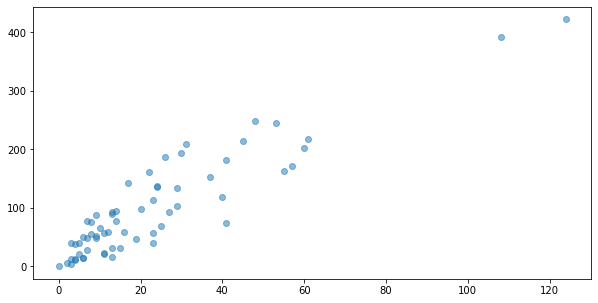

In [19]:
plt.figure(figsize = (10,5))
plt.plot(raw_X,y, 'o', alpha = 0.5)

- 앞에 상수항 붙여주기

In [20]:
np.ones((len(raw_X), 1))[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

- 두 data가 two dimesion이여야 concat 가능

In [21]:
# axis = 1 : Column을 기준으로
X = np.concatenate( (np.ones((len(raw_X), 1)), raw_X), axis = 1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

- 임의의 두 data 추출

In [33]:
w = np.random.normal((2,1))
w

array([1.32679304, 1.50043929])

$\hat{y}= Xw$  

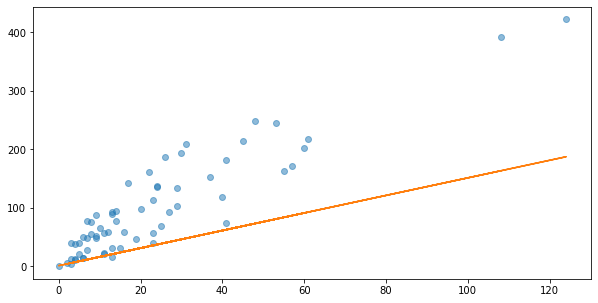

In [34]:
plt.figure(figsize=(10, 5))

# y_hat = X x w
y_predict = np.dot(X, w)
plt.plot(raw_X, y, 'o', alpha = 0.5)
# line으로 plotting
plt.plot(raw_X, y_predict)

- 사용할 함수 만들어보기

$f(x) = h_{\theta}(x) = Xw$

In [35]:
def hypothesis_function(X, theta):
    return X.dot(theta)

- 예측치들 (Vector 형태)

In [36]:
hypothesis_function(X, w)[:5]

array([163.37423636,  29.83513955,  20.83250381, 187.381265  ,
        61.34436464])

In [37]:
hypothesis_function(X, w).shape

(63,)

#### One Variable Linear Regression
$J(w_0,w_1) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{i}) -y^{i})^2$ 

In [38]:
def cost_function(h, y):
    return( 1 / ( 2 * len(y) ) ) * np.sum((h-y)**2)

In [39]:
y.shape

(63,)

In [40]:
h = hypothesis_function(X,w)
# scalar 형태
cost_function(h, y)

3560.439771035372

#### <span style = 'background-color:#fff5b1'>Gradient Descent 함수</span> 
- $\alpha$ : Learning rate

- $h_{\theta}(x^i) = w_{1} x^{(i)} + w_{0}$
- $\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})$ 

- $\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial w_0}$

- $\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})x^{(i)}$

- $\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial w_1}$

In [41]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)

    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        # to update, 초반에 설정한 theta 이용
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        # t1 update
        t1 = theta[1] - (alpha / m) * np.sum( (np.dot(X, theta ) - y ) *  X[:,1])
        # t0, t1 update 후 theta update
        theta = np.array([t0, t1])

        # 10을 주기로 cost_list update
        if i % 10 == 0 :
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
        
    return theta, theta_list, cost_list

<span style= 'color:#008000'>t0, t1 따로 변수명 해주는 게 좋은 방법은 아님!</span>

#### Do Linear Regression with GD

In [42]:
X = np.concatenate( (np.ones((len(raw_X), 1)), raw_X), axis = 1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [43]:
y = df['Y'].values
y # one dimension

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
         4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
        98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
       217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
        73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
        55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5])

In [44]:
w = np.random.normal((2,1))
w

array([2.12550562, 1.12751975])

In [45]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print('theta:', theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88096424  3.41627476]
cost: 625.3742229936598


- $\alpha$가 크면 학습이 안됨!

In [46]:
theta_list = np.array(theta_list)
theta_list[:5]

array([[2.12550562, 1.12751975],
       [2.19574185, 3.96322606],
       [2.28195308, 3.79627915],
       [2.37127452, 3.79435048],
       [2.46014553, 3.79243155]])

In [47]:
cost_list[:5]

[4494.538889123522,
 719.9612865150825,
 704.6934645633169,
 703.8954606482492,
 703.1054848494095]

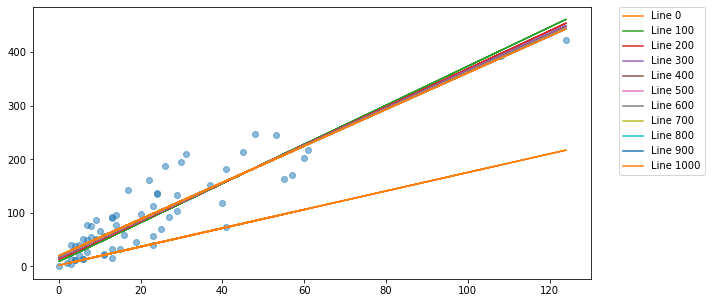

In [103]:
plt.figure(figsize=(10,5))

# EX) X ; 63 by 2, y ; 100 by 2 => y.transpose() ; 2 by 100
# theta : 63개 => 예측값 ; 63번동안 예측한 값
y_predict_step = np.dot(X, theta_list.transpose())

plt.plot(raw_X, y, 'o', alpha = 0.5)

# 100번 마다 나타내기
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:,i], label = 'Line %d' %i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

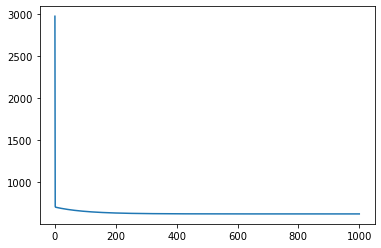

In [104]:
plt.plot(range(len(cost_list)), cost_list)

In [48]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]

TH0, TH1 = np.meshgrid(th0, th1)

In [49]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) 
        for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])

Js = Js.reshape(TH0.shape)

- 가로축 : $\theta_0$
- 세로축 : $\theta_1$

<a list of 7 text.Text objects>

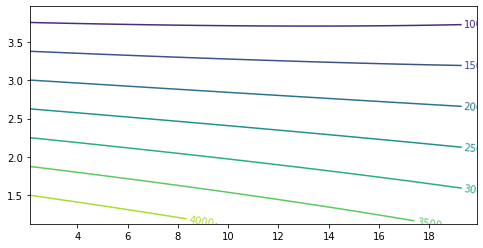

In [50]:
plt.figure(figsize = (8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline = True, fontsize = 10, inline_spacing = 2)

In [51]:
from mpl_toolkits.mplot3d import Axes3D

# 100개의 구간
ms = np.linspace(theta[0] - 15, theta[0]+ 15, 100)
bs = np.linspace(theta[1] - 15, theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([cost_function(y, hypothesis_function(X, theta) )
        for theta in zip(np.ravel(M), np.ravel(B))])

z = zs.reshape(M.shape)

In [52]:
import warnings
warnings.filterwarnings(action = 'ignore')

- Intercept : $\theta_0$
- Slope : $\theta_1$

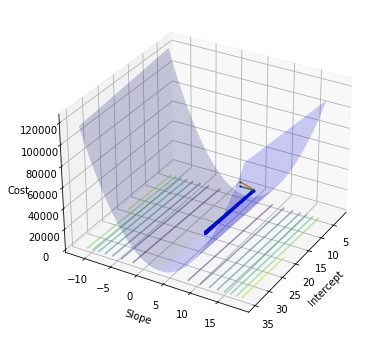

In [57]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(M,B,z,rstride = 1, cstride = 1, color ='b', alpha = 0.2)
ax.contour(M,B,z,10, color = 'b', alpha = 0.5, offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')

ax.view_init(elev = 30., azim = 30)

ax.plot([theta[0]], [theta[1]], [cost_list[-1]], markerfacecolor = 'r', markeredgecolor = 'r', marker ='x', markersize = 2)

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor = 'g', markeredgecolor = 'g', marker = 'o', markersize =1)

ax.plot(theta_list[:,0], theta_list[:,1], 0, markerfacecolor = 'b', markeredgecolor = 'b', marker = '.', markersize = 2)

### 7️⃣ Multivariate Linear Regression
#### ✅ 한 개 이상의 Feature로 구성된 데이터를 분석할 때
식이 많아지짐나 여전히 목적은 동일하다 ; <span style = 'background-color:#fff5b1'>Cost 함수의 최적화</span>

#### ✅ Gradient
- $\frac{\partial J}{\partial w_n} = \frac{1}{m} \sum_{i=1}^m (x^{(i)}w - y^{(i)})x_n$

In [58]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

#### 임의의 Data 생성하는 함수

- numPoints : number of Points 데이터 개수
- bias : 기본 절편값

In [59]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 3))
    y = np.zeros(shape = numPoints)

    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0,1) * variance + i
        x[i][1] = random.uniform(0,1) * variance + i
        x[i][2] = 1

        # our target variable
        y[i] = (i + bias) + random.uniform(0,1) * variance + 500
    return x, y

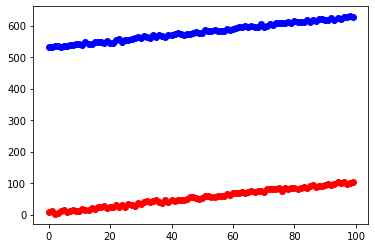

In [60]:
x, y = gen_data(100, 25, 10)

plt.plot(x[:,0:1], 'ro')
plt.plot(y, 'bo')

plt.show()

- $x_1, x_2, x_0$ 형태
- 100 by 3

In [61]:
x[:5]

array([[ 7.72476696,  9.54561396,  1.        ],
       [ 9.90787407,  3.72191763,  1.        ],
       [ 2.01770382,  6.12840219,  1.        ],
       [ 5.66154698, 11.45512481,  1.        ],
       [11.89128561,  9.14275775,  1.        ]])

In [62]:
y[:5]

array([532.75436626, 532.09998116, 535.60726169, 533.99120566,
       533.29357568])

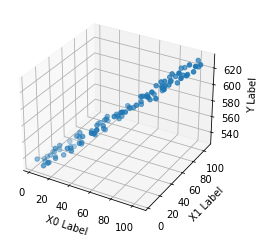

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

#### Cost 구해주는 함수

In [85]:
def compute_cost(x, y, theta):
    '''
    Comput cost for linear regression
    '''

    # Number of training samples
    m = y.size
    # y_predict = xw
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = ( 1.0/ (2 * m) ) * sqErrors.T.dot(sqErrors)
    return J

In [86]:
def minimize_gradient(x, y, theta, iterations = 100000, alpha = 0.01):
    m = y.size
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        # xw, 100 by1
        predictions = x.dot(theta)

        # 0~n ; number of features 만큼 발생
        for n in range(theta.size):
            partial_marginal = x[:, n]
            # (100 by 1 - 100 by 1) * (100 by 1) => 100 by 1
            errors_xn = (predictions - y) * partial_marginal
            # theta update 
            theta[n] = theta[n] - alpha * (1.0 / m) * errors_xn.sum()

        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))
    
    return theta, np.array(cost_history), np.array(theta_history)

- theta : $w_1, w_2, w_0$

- If iteration or alpha is small, then nan

In [87]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 10000, 0.001)
print('theta', theta)

theta [nan nan nan]


In [89]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 100000, 0.0001)
print('theta', theta)

theta [-5.22702713e-02  1.98831676e+00  4.60961500e+02]


- Coefficients : $w_1, w_2$

In [76]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# The coefficients
print('Coefficients: ', regr.coef_) 
print('intercept: ', regr.intercept_)

Coefficients:  [0.48789893 0.52019944]
intercept:  524.860632478165


위의 두 $\theta$값이 그 위의 $\theta$값과 조금 차이가 나는 것을 볼 수 있다  
$\Rightarrow$ iterations를 변경해보자.

In [90]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 1000000, 0.0001)
print('theta', theta)

theta [4.87898925e-01 5.20199453e-01 5.24860632e+02]


In [91]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

539.9178464168971
[539.91784669]


- cost가 내려가는 것을 볼 수 있음

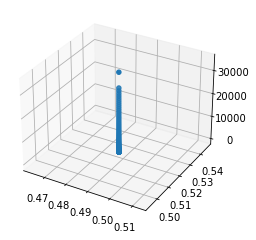

In [92]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(theta_history[:,0], theta_history[:,1], cost_history, zdir = 'z')

plt.show()

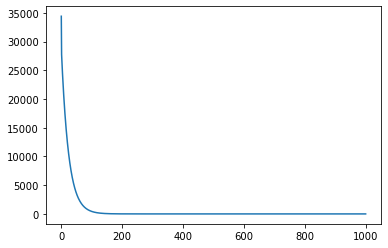

In [93]:
plt.plot(cost_history)
plt.show()

초기값을 설정하는 것이 가장 중요

### 8️⃣ Performance measure
#### 만들어진 모델의 성능은 어떻게 평가할 것인가? 
평가할 수 있는 Measure(측정지표) 필요

### ▶ Regression metrics

### - <span style= 'color:#008000'>Mean Absolute Error</span>  
- 잔차의 절대값의 Sum 
  
    #### MAE = $\frac{1}{m} \sum_{i=1}^m \left\lvert y_{i} - \hat{y_{i}} \right\rvert = \frac{1}{m} \sum_{i=1}^m \left\lvert e_{i} \right\rvert$   

In [95]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

### - <span style= 'color:#008000'>Root Mean Squared Error (RMSE) </span>
- 잔차 제곱의 sum의 루트  

    #### RMSE = $\sqrt{\frac{1}{m}\sum_{i=1}^m(y_{i} - \hat{y_{i}})^2}$


- 0에 가까울 수록 좋은 지표
- (sklearn에서 제공하고 있지 않기 때문에 mean_squared_error를 이용해서 만들어줘야함)

In [96]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
# root 안씌운 상태!
mean_squared_error(y_true, y_pred) 

0.375

### - <span style= 'color:#008000'>R squared</span>
- 0과 1사이 숫자로 크면 클수록 높은 적합도를 지님
- 적합도가 얼마인지
- 1에 가까울 수록 좋은 지표

#### $R^{2} = 1 - \frac{ \Sigma_{i}( y_{i} - \hat{y_{i}} )^{2} }{ \Sigma_{i}( y_{i} - \mu )^{2}}$

In [97]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
# root 안씌운 상태!
r2_score(y_true, y_pred) 

0.9486081370449679

#### 모델을 만드는 데이터와 평가받는 데이터 나누기
- 모델을 만드는 Data : Training Data
- 평가 받는 Data : Test Data

### 📌 Training & Test Data set
- Training한 Data로 다시 Test할 경우   
<span style = 'color:red'>Training Data에 과도하게(Over) fitting된 모델</span>을 사용될 수 있음

- 새로운 Data가 출현했을 때, 기존 모델과의 차이 존재

- 모델은 새로운 데이터가 처리가능하도록 <span style = 'color:blue'>generalize</span> 되야함
- 이를 위해 <span style= 'color:blue'>Trainig Set과 Test Set 분리</span>  

  
Regression에서 완벽하게 맞추는 건 불가능 ❗  
어느 정도 오차는 존재 ❗  
오차를 최소화 하는 것이 중요 ❗

### 1. Hold-out Method (Sampling)
- Data를 Training & Test로 나눠서 모델을 생성하고 Test하는 Method
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법
- Training & Test를 나누는 비율은 데이터의 크기에 따라 다름
- 일반적으로 Training Data 2/3, Test Data 1/3를 활용

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5,2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)